In [1]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Load the CIFAR10 dataset

from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xTrain = xTrain[:50000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:50000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))



Using TensorFlow backend.
C:\Users\91509\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91509\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91509\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91509\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Train image shape:    (50000, 32, 32, 3)
Train label shape:    (50000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


In [2]:
#Reshaping Data into a Vector and Normalizing it (-1 to 1)
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(50000, 32, 32, 3)
(50000,)
(50000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(50000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [ ]:
#SVM Linear Kernel
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xTest)
    acc_test = np.mean(Yhat_svc_linear_test == yTest)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))

Train Accuracy = 0.354667
Test Accuracy = 0.098000
Train Accuracy = 0.484667
Test Accuracy = 0.188000
Train Accuracy = 0.709333
Test Accuracy = 0.253000
Train Accuracy = 0.989667
Test Accuracy = 0.286000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000


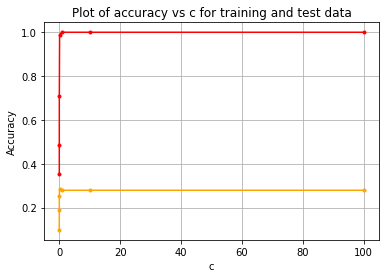

In [5]:
c_svm_linear = [0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()